In [37]:
import requests
from bs4 import BeautifulSoup
import csv
import numpy as np
import pandas as pd
import re

In [106]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Gynecologist%2Fobstetrician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi")

page
soup = BeautifulSoup(page.text)
Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Dhwani Mago', 'Dr. Shivani Sachdev Gour', 'Dr. Shilpi Juneja', 'Dr. Ruchi Tandon', 'Dr. Malvika Sabharwal', 'Dr. Parul Katiyar', 'Dr. Madhu Ahuja', 'Dr. Neha Khandelwal', 'Dr. Madhu Goel', 'Dr. Pratibha Gupta']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Greater Kailash Part 1,', 'Greater Kailash Part 1,', 'Greater Kailash Part 1,', 'Greater Kailash Part 1,', 'Karol Bagh,', 'Defence Colony,', 'Patparganj,', 'Greater Kailash Part 1,', 'Greater Kailash Part 2,', 'Janakpuri,']
10
----------------------------------------------------------------------------------------------------
['1000', '1000', '1000', '1000', '1000', '1100', '1200', '1500', '700']
9
--------------------------------------------------------------------------------

In [48]:
Hospital_name=[]
for i in soup.find_all("span",class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)
print(Hospital_name)

['SCI International Hospital', '\xa0+ 1 more', 'Jeewan Mala Hospital', '\xa0+ 2 more', 'SCI International Hospital', '\xa0+ 3 more', 'SCI International Hospital', 'SCI International Hospital', '\xa0+ 1 more', 'ART Fertility Clinics', '\xa0+ 1 more', 'Cloudnine Hospitals', '\xa0+ 1 more', 'Apollo Cradle & Children’s Hospital', '\xa0+ 1 more', 'Nulife Hospital & Maternity Center', 'Indraprastha Apollo Hospitals', '\xa0+ 1 more']


In [49]:
# Original list
Hospital_name = ['SCI International Hospital', '\xa0+ 1 more', 'Jeewan Mala Hospital', '\xa0+ 2 more', 'SCI International Hospital', 'SCI International Hospital', '\xa0+ 3 more', 'ART Fertility Clinics', '\xa0+ 1 more', 'BLK-Max Super Speciality Hospital', '\xa0+ 1 more', 'Apollo Cradle & Children’s Hospital', '\xa0+ 1 more', 'Nulife Hospital & Maternity Center', 'Bloom Vision Clinic', "Dr. (Prof.) Sadhana Kala's Clinic", '\xa0+ 3 more']

# Create a new list without elements matching the pattern
new_Hospital_name = [name for name in Hospital_name if not name.startswith('\xa0+ ')]

# Print the new list
print(new_Hospital_name)

# Get the length of the new list
print(len(new_Hospital_name))


['SCI International Hospital', 'Jeewan Mala Hospital', 'SCI International Hospital', 'SCI International Hospital', 'ART Fertility Clinics', 'BLK-Max Super Speciality Hospital', 'Apollo Cradle & Children’s Hospital', 'Nulife Hospital & Maternity Center', 'Bloom Vision Clinic', "Dr. (Prof.) Sadhana Kala's Clinic"]
10


In [50]:
p = soup.find_all("div",class_="u-grey_3-text")
p

[<div class="u-grey_3-text u-smallest-font">Fed up of endless wait?</div>,
 <div class="u-grey_3-text"><div><span class="u-t-underline u-c-pointer" tabindex="0">1 Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top"><span tabindex="0">30 - 35 years experience</span></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>16<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>42<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="u-grey_3-text"><div class="u-d-flex"><span>Gynecologist/Obstetrician</span></div><div class="uv2-spacer--xs-top" data-qa-id="doctor_experience"><div>25<!-- --> <span>years experience overall</span></div></div></div>,
 <div class="

In [51]:
Specialist=re.findall(r"(Gynecologist/Obstetrician)<",str(p))
Specialist
#Specialist.remove('Gynecologist/Obstetrician')
print(Specialist)
print(len(Specialist))

['Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician', 'Gynecologist/Obstetrician']
11


In [55]:

print(f"Length of Doctor_name: {len(Doctor_name)}")
print(f"Length of Specialist: {len(Specialist)}")


Length of Doctor_name: 294
Length of Specialist: 11


In [56]:
list_length = min(len(Doctor_name), len(Specialist), len(experience), len(City_name), len(Area), len(Hospital_name), len(consultation_fee), len(recommendation))

dictionary = {
    "Doctor_name": Doctor_name[:list_length],
    "Specialist": Specialist[:list_length],
    "Experience": experience[:list_length],
    "City_name": City_name[:list_length],
    "Area": Area[:list_length],
    "Hospital_name": Hospital_name[:list_length],
    "Consultation_fee": consultation_fee[:list_length],
    "Recommendation": recommendation[:list_length],
}

Gynecologist_df1 = pd.DataFrame(dictionary)
# Print the DataFrame
print(Gynecologist_df1)

                Doctor_name                 Specialist Experience City_name  \
0           Dr. Dhwani Mago  Gynecologist/Obstetrician         16     Delhi   
1     Dr. Malvika Sabharwal  Gynecologist/Obstetrician         42     Delhi   
2  Dr. Shivani Sachdev Gour  Gynecologist/Obstetrician         25     Delhi   
3         Dr. Shilpi Juneja  Gynecologist/Obstetrician         18     Delhi   
4          Dr. Ruchi Tandon  Gynecologist/Obstetrician         18     Delhi   
5         Dr. Parul Katiyar  Gynecologist/Obstetrician         20     Delhi   
6           Dr. Madhu Ahuja  Gynecologist/Obstetrician         39     Delhi   
7       Dr. Yuvakshi Juneja  Gynecologist/Obstetrician         41     Delhi   
8       Dr. Shakuntla Kumar  Gynecologist/Obstetrician         36     Delhi   
9          Dr. Sushma Sinha  Gynecologist/Obstetrician         37     Delhi   

                      Area                      Hospital_name  \
0  Greater Kailash Part 1,         SCI International Hospital   


In [57]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Dentist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi")
page
soup = BeautifulSoup(page.text)

Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Dheeraj Setia', 'Dr. Geetanjali Marya', 'Dr. Harveen Nakra', 'Dr. Kapil Saroha', 'Dr. Radhika Sahni', 'Dr. Pallav Kinra', 'Dr. Karan Marya', 'Dr. Tanvir Singh', 'Dr. Deepak Nakra', 'Dr. Gunita Singh']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Panchsheel Park,', 'Greater Kailash Part 2,', 'Punjabi Bagh,', 'Rohini,', 'New Friends Colony,', 'Sheikh Sarai,', 'Greater Kailash Part 2,', 'Chattarpur,', 'Punjabi Bagh,', 'Chattarpur,']
10
----------------------------------------------------------------------------------------------------
['1000', '800', '500', '500', '500', '800', '500', '500', '500']
9
----------------------------------------------------------------------------------------------------
['98% ', '98% ', '100% ', '97% '

In [58]:
Hospital_name = []
for i in soup.find_all("span", class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)

# Check if the elements exist in the list before removing them
if '\xa0+ 3 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 3 more')
if '\xa0+ 2 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 2 more')
if '\xa0+ 2 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 2 more')
if '\xa0+ 3 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 3 more')

print(Hospital_name)
print(len(Hospital_name))


['The Dental Roots', "Marya's Dental and Implant Centre", 'Dental World', '\xa0+ 1 more', 'Kapil Dental Clinic and Implant Center', "Dr. Sahni's Dental Clinic", 'Southpoint Dentistry', "Marya's Dental and Implant Centre", 'Dentem the Dental & Orthodontic Clinic', '\xa0+ 4 more', 'Dental World', '\xa0+ 1 more', 'Dentem the Dental & Orthodontic Clinic']
13


In [59]:
p = soup.find_all("div",class_="u-grey_3-text")
p
Specialist = re.findall(r"(Dentist)<",str(p))
Specialist
Specialist.remove('Dentist')
len(Specialist)

10

In [60]:


# Check the length of the shortest list among the data
min_length = min(len(Doctor_name), len(Specialist), len(experience), len(City_name), len(Area), len(Hospital_name), len(consultation_fee), len(recommendation))

# Create a dictionary with lists of the same length
dictionary = {
    "Doctor_name": Doctor_name[:min_length],
    "Specialist": Specialist[:min_length],  # Replace with the actual list of specialists
    "Experience": experience[:min_length],
    "City_name": City_name[:min_length],
    "Area": Area[:min_length],
    "Hospital_name": Hospital_name[:min_length],
    "Consultation_fee": consultation_fee[:min_length],
    "Recommendation": recommendation[:min_length],
}

# Create the Dentist_df1 DataFrame
Dentist_df1 = pd.DataFrame(dictionary)

# Print the DataFrame
print(Dentist_df1)


            Doctor_name Specialist Experience City_name  \
0     Dr. Dheeraj Setia    Dentist         22     Delhi   
1  Dr. Geetanjali Marya    Dentist         36     Delhi   
2     Dr. Harveen Nakra    Dentist         23     Delhi   
3      Dr. Kapil Saroha    Dentist         14     Delhi   
4     Dr. Radhika Sahni    Dentist         27     Delhi   
5      Dr. Pallav Kinra    Dentist         14     Delhi   
6       Dr. Karan Marya    Dentist         40     Delhi   
7      Dr. Tanvir Singh    Dentist         28     Delhi   
8      Dr. Deepak Nakra    Dentist         23     Delhi   

                      Area                           Hospital_name  \
0         Panchsheel Park,                        The Dental Roots   
1  Greater Kailash Part 2,       Marya's Dental and Implant Centre   
2            Punjabi Bagh,                            Dental World   
3                  Rohini,                                + 1 more   
4      New Friends Colony,  Kapil Dental Clinic and Implant

In [61]:

# Concatenate the DataFrames vertically
combined_df = pd.concat([Dentist_df1, Gynecologist_df1], ignore_index=True)

# The `ignore_index=True` argument resets the index of the combined DataFrame

# Print the combined DataFrame
print(combined_df)


                 Doctor_name                 Specialist Experience City_name  \
0          Dr. Dheeraj Setia                    Dentist         22     Delhi   
1       Dr. Geetanjali Marya                    Dentist         36     Delhi   
2          Dr. Harveen Nakra                    Dentist         23     Delhi   
3           Dr. Kapil Saroha                    Dentist         14     Delhi   
4          Dr. Radhika Sahni                    Dentist         27     Delhi   
5           Dr. Pallav Kinra                    Dentist         14     Delhi   
6            Dr. Karan Marya                    Dentist         40     Delhi   
7           Dr. Tanvir Singh                    Dentist         28     Delhi   
8           Dr. Deepak Nakra                    Dentist         23     Delhi   
9            Dr. Dhwani Mago  Gynecologist/Obstetrician         16     Delhi   
10     Dr. Malvika Sabharwal  Gynecologist/Obstetrician         42     Delhi   
11  Dr. Shivani Sachdev Gour  Gynecologi

In [62]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Dermatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi")
page
soup = BeautifulSoup(page.text)

Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Vijay Singhal', 'Dr. Pallav S Kishanpuria', 'Dr. Tanvi Pal', 'Dr. Sirisha Singh', 'Dr. Deepti  Shrivastava', 'Dr. Shruti Gupta', 'Dr. Richa Sharma', 'Dr. Divya Aggarwal', 'Dr. Gaurav Bhardwaj', 'Dr. Arihant Surana']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Punjabi Bagh,', 'Pusa Road,', 'Pusa Road,', 'Greater Kailash Part 1,', 'Anand Vihar,', 'Kamla Nagar,', 'Dwarka,', 'Shalimar Bagh,', 'Pusa Road,', 'Defence Colony,']
10
----------------------------------------------------------------------------------------------------
['800', '1500', '1500', '1500', '800', '1000', '1500', '800', '1500', '1000']
10
----------------------------------------------------------------------------------------------------
['93% ', '93% ', '97% ', '

In [63]:
Hospital_name = []
for i in soup.find_all("span", class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)

# Check if the elements exist in the list before removing them
if '\xa0+ 3 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 3 more')
if '\xa0+ 2 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 2 more')
if '\xa0+ 2 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 2 more')
if '\xa0+ 3 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 3 more')

print(Hospital_name)
print(len(Hospital_name))


['Zenith Skin Hair & Dental Centre', '\xa0+ 1 more', 'BLK-Max Super Speciality Hospital', '\xa0+ 1 more', 'BLK-Max Super Speciality Hospital', 'SCI International Hospital', 'Skin Hair & You', 'SKINOS', 'Twacha Skin Clinic', 'Max Super Speciality Hospital', 'BLK-Max Super Speciality Hospital', '\xa0+ 1 more', 'Monaris Skin and Hair Clinic']
13


In [64]:
p = soup.find_all("div",class_="u-grey_3-text")
p
Specialist = re.findall(r"(Dermatologist)<",str(p))
Specialist
Specialist.remove('Dermatologist')
len(Specialist)

10

In [65]:
# Check the length of the shortest list among the data
min_length = min(len(Doctor_name), len(Specialist), len(experience), len(City_name), len(Area), len(Hospital_name), len(consultation_fee), len(recommendation))

# Create a dictionary with lists of the same length
dictionary = {
    "Doctor_name": Doctor_name[:min_length],
    "Specialist": Specialist[:min_length],  # Replace with the actual list of specialists
    "Experience": experience[:min_length],
    "City_name": City_name[:min_length],
    "Area": Area[:min_length],
    "Hospital_name": Hospital_name[:min_length],
    "Consultation_fee": consultation_fee[:min_length],
    "Recommendation": recommendation[:min_length],
}

# Create the Dermatologist _df1 DataFrame
Dermatologist_df1 = pd.DataFrame(dictionary)

# Print the DataFrame
print(Dermatologist_df1)


                Doctor_name     Specialist Experience City_name  \
0         Dr. Vijay Singhal  Dermatologist         18     Delhi   
1  Dr. Pallav S Kishanpuria  Dermatologist         19     Delhi   
2             Dr. Tanvi Pal  Dermatologist         19     Delhi   
3         Dr. Sirisha Singh  Dermatologist         29     Delhi   
4   Dr. Deepti  Shrivastava  Dermatologist         28     Delhi   
5          Dr. Shruti Gupta  Dermatologist         13     Delhi   
6          Dr. Richa Sharma  Dermatologist         26     Delhi   
7        Dr. Divya Aggarwal  Dermatologist         21     Delhi   
8       Dr. Gaurav Bhardwaj  Dermatologist         11     Delhi   
9        Dr. Arihant Surana  Dermatologist         23     Delhi   

                      Area                      Hospital_name  \
0            Punjabi Bagh,   Zenith Skin Hair & Dental Centre   
1               Pusa Road,                           + 1 more   
2               Pusa Road,  BLK-Max Super Speciality Hospital   
3 

In [66]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22General%20Physician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi")
page
soup = BeautifulSoup(page.text)

Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Rajinder Kumar Singal', 'Dr. Vishal Kaura Aggarwal', 'Dr. Amitabh Khanna', 'Dr. Navneet Kaur', 'Dr. Hari Kumar Yadav', 'Dr. Atul Bhasin', 'Dr. Narinder Tikoo', 'Dr. Anuj Gupta', 'Dr. K.S. Walia', 'Dr. (Maj.)Sharad Shrivastava']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Pusa Road,', 'Pusa Road,', 'Dwarka,', 'Greater Kailash Part 1,', 'Saket,', 'Pusa Road,', 'Sarita Vihar,', 'Munirka,', 'Sarita Vihar,', 'Dwarka Sector 7,']
10
----------------------------------------------------------------------------------------------------
['1800', '1500', '1200', '500', '800', '1800', '1500', '1250', '600', '800']
10
----------------------------------------------------------------------------------------------------
['85% ', '100% ', '81% ',

In [67]:
Hospital_name = []
for i in soup.find_all("span", class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)

# Check if the elements exist in the list before removing them
if '\xa0+ 3 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 3 more')
if '\xa0+ 2 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 2 more')
if '\xa0+ 2 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 2 more')
if '\xa0+ 3 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 3 more')

print(Hospital_name)
print(len(Hospital_name))


['BLK-Max Super Speciality Hospital', '\xa0+ 1 more', 'BLK-Max Super Speciality Hospital', 'Diabetes Speciality Center', '\xa0+ 1 more', 'Apollo Spectra Hospital', 'Max Super Speciality Hospital - Saket East Wing', 'BLK-Max Super Speciality Hospital', 'Indraprastha Apollo Hospitals', 'K L Chest + Diagnostic Clinic', 'Walia Medical and Maternity Centre', 'Gouri Clinic', '\xa0+ 1 more']
13


In [68]:
p = soup.find_all("div",class_="u-grey_3-text")
p
Specialist = re.findall(r"(General Physician)<",str(p))
Specialist
Specialist.remove('General Physician')
len(Specialist)

10

In [69]:
# Check the length of the shortest list among the data
min_length = min(len(Doctor_name), len(Specialist), len(experience), len(City_name), len(Area), len(Hospital_name), len(consultation_fee), len(recommendation))

# Create a dictionary with lists of the same length
dictionary = {
    "Doctor_name": Doctor_name[:min_length],
    "Specialist": Specialist[:min_length],  # Replace with the actual list of specialists
    "Experience": experience[:min_length],
    "City_name": City_name[:min_length],
    "Area": Area[:min_length],
    "Hospital_name": Hospital_name[:min_length],
    "Consultation_fee": consultation_fee[:min_length],
    "Recommendation": recommendation[:min_length],
}

# Create the General Physician_df1 DataFrame
GeneralPhysician_df1 = pd.DataFrame(dictionary)

# Print the DataFrame
print(GeneralPhysician_df1)


                    Doctor_name         Specialist Experience City_name  \
0     Dr. Rajinder Kumar Singal  General Physician         41     Delhi   
1     Dr. Vishal Kaura Aggarwal  General Physician         26     Delhi   
2            Dr. Amitabh Khanna  General Physician         37     Delhi   
3              Dr. Navneet Kaur  General Physician         25     Delhi   
4          Dr. Hari Kumar Yadav  General Physician         16     Delhi   
5               Dr. Atul Bhasin  General Physician         32     Delhi   
6            Dr. Narinder Tikoo  General Physician         47     Delhi   
7                Dr. Anuj Gupta  General Physician         24     Delhi   
8                Dr. K.S. Walia  General Physician         49     Delhi   
9  Dr. (Maj.)Sharad Shrivastava  General Physician         30     Delhi   

                      Area                                    Hospital_name  \
0               Pusa Road,                BLK-Max Super Speciality Hospital   
1               

In [83]:




# Create a list of the DataFrames you want to concatenate
data_frames1 = [Dentist_df1, Gynecologist_df1, Dermatologist_df1, GeneralPhysician_df1]

# Concatenate the DataFrames vertically with ignore_index=True
combined_df1 = pd.concat(data_frames, ignore_index=True)

# Print the combined DataFrame
print(combined_df1)



                     Doctor_name                 Specialist Experience  \
0              Dr. Dheeraj Setia                    Dentist         22   
1           Dr. Geetanjali Marya                    Dentist         36   
2              Dr. Harveen Nakra                    Dentist         23   
3               Dr. Kapil Saroha                    Dentist         14   
4              Dr. Radhika Sahni                    Dentist         27   
5               Dr. Pallav Kinra                    Dentist         14   
6                Dr. Karan Marya                    Dentist         40   
7               Dr. Tanvir Singh                    Dentist         28   
8               Dr. Deepak Nakra                    Dentist         23   
9                Dr. Dhwani Mago  Gynecologist/Obstetrician         16   
10         Dr. Malvika Sabharwal  Gynecologist/Obstetrician         42   
11      Dr. Shivani Sachdev Gour  Gynecologist/Obstetrician         25   
12             Dr. Shilpi Juneja  Gyne

In [84]:
from tabulate import tabulate

# Assuming you have the 'combined_df' DataFrame

# Convert the DataFrame to a tabular format
table = tabulate(combined_df1, headers='keys', tablefmt='grid', showindex=False)

# Print the tabulated table
print(table)


+------------------------------+---------------------------+--------------+-------------+-------------------------+-------------------------------------------------+--------------------+------------------+
| Doctor_name                  | Specialist                |   Experience | City_name   | Area                    | Hospital_name                                   |   Consultation_fee | Recommendation   |
+==============================+===========================+==============+=============+=========================+=================================================+====================+==================+
| Dr. Dheeraj Setia            | Dentist                   |           22 | Delhi       | Panchsheel Park,        | The Dental Roots                                |               1000 | 98%              |
+------------------------------+---------------------------+--------------+-------------+-------------------------+-------------------------------------------------+-----------

In [71]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Homoeopath%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi")
page
soup = BeautifulSoup(page.text)

Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Neeraj Pasricha', 'Dr. Chhavi Bansal', 'Dr. Sneh Khera', 'Dr. Poonam Pasricha', 'Dr. Ranjana Gupta', 'Dr. Sunil Kumar Dwivedi', 'Dr. C B Singh', 'Dr. R.C Upadhyaya', 'Dr. Geetika Bansal', 'Dr. Pratima Grover']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Paschim Vihar,', 'Pitampura,', 'Lajpat Nagar 4,', 'Paschim Vihar,', 'Dwarka,', 'Dwarka,', 'Laxmi Nagar,', 'Vasundhra Enclave,', 'Dwarka Sector 2,', 'Mayur Vihar Ph-I,']
10
----------------------------------------------------------------------------------------------------
['1000', '700', '330', '1000', '700', '400', '500', '1300', '700', '500']
10
----------------------------------------------------------------------------------------------------
['93% ', '98% ', '93% ', '100% '

In [122]:
Hospital_name = []
for i in soup.find_all("span", class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)

# Check if the elements exist in the list before removing them
if '\xa0+ 3 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 3 more')
if '\xa0+ 2 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 2 more')
if '\xa0+ 2 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 2 more')
if '\xa0+ 3 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 3 more')

print(Hospital_name)
print(len(Hospital_name))

['Pasricha Homeo Care Clinics', "Dr Khera's Homoeopathic Clinic", 'SD Homoeopathy Multispecality Clinic', '\xa0+ 1 more', 'Dr Singh Clinic', '\xa0+ 1 more', "Dr Geetika's Homeopathic Clinic", 'Holistic Homoeopathic Care', '\xa0+ 1 more', "Dr Anika's Homoeo Health Care", 'Niruja Homeopathic Solutions', "Dr Gurpreet Juneja's Homeopathy Clinic", '\xa0+ 1 more', 'Avinashi Homoeopathic Clinic']
14


In [72]:
p = soup.find_all("div",class_="u-grey_3-text")
p
Specialist = re.findall(r"(Homoeopath)<",str(p))
Specialist
Specialist.remove('Homoeopath')
len(Specialist)

10

In [73]:
# Check the length of the shortest list among the data
min_length = min(len(Doctor_name), len(Specialist), len(experience), len(City_name), len(Area), len(Hospital_name), len(consultation_fee), len(recommendation))

# Create a dictionary with lists of the same length
dictionary = {
    "Doctor_name": Doctor_name[:min_length],
    "Specialist": Specialist[:min_length],  # Replace with the actual list of specialists
    "Experience": experience[:min_length],
    "City_name": City_name[:min_length],
    "Area": Area[:min_length],
    "Hospital_name": Hospital_name[:min_length],
    "Consultation_fee": consultation_fee[:min_length],
    "Recommendation": recommendation[:min_length],
}

# Create the Homoeopath_df1 DataFrame
Homoeopath_df1 = pd.DataFrame(dictionary)

# Print the DataFrame
print(Homoeopath_df1)


               Doctor_name  Specialist Experience City_name  \
0      Dr. Neeraj Pasricha  Homoeopath         41     Delhi   
1        Dr. Chhavi Bansal  Homoeopath         13     Delhi   
2           Dr. Sneh Khera  Homoeopath         38     Delhi   
3      Dr. Poonam Pasricha  Homoeopath         38     Delhi   
4        Dr. Ranjana Gupta  Homoeopath         27     Delhi   
5  Dr. Sunil Kumar Dwivedi  Homoeopath         18     Delhi   
6            Dr. C B Singh  Homoeopath         11     Delhi   
7        Dr. R.C Upadhyaya  Homoeopath         36     Delhi   
8       Dr. Geetika Bansal  Homoeopath         25     Delhi   
9       Dr. Pratima Grover  Homoeopath         38     Delhi   

                 Area                                    Hospital_name  \
0      Paschim Vihar,                BLK-Max Super Speciality Hospital   
1          Pitampura,                                         + 1 more   
2     Lajpat Nagar 4,                BLK-Max Super Speciality Hospital   
3      Pas

In [125]:
page = requests.get("https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22Ayurveda%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city=Delhi")
page
soup = BeautifulSoup(page.text)

Doctor_name=[]
for i in soup.find_all("h2",class_="doctor-name"):
    Doctor_name.append(i.text)
print(Doctor_name)
print(len(Doctor_name))
print("--"*50)

City_name=[]
for i in soup.find_all("span",class_="u-t-capitalize"):
    City_name.append(i.text)
print(City_name)
print(len(City_name))
print("--"*50)

Area=[]
for i in soup.find_all("span",attrs={"data-qa-id":"practice_locality"}):
    Area.append(i.text)
print(Area)
print(len(Area))
print("--"*50)

q = soup.find_all("span",attrs={"data-qa-id":"consultation_fee"})
q
consultation_fee=re.findall(r"\d+\d+\w+",str(q))
print(consultation_fee)
print(len(consultation_fee))
print("--"*50)

recommendation=[]
for i in soup.find_all("span",attrs={"data-qa-id":"doctor_recommendation"}):
        recommendation.append(i.text)
#recommendation.insert(2,"nan")
print(recommendation)
print(len(recommendation))
print("--"*50)

s=soup.find_all('div',{"data-qa-id":"doctor_experience"})
experience = re.findall(r"(\d+)<",str(s))
print(experience)
print(len(experience))
print("--"*50)

['Dr. Mahesh Shah', 'Dr. Sudha Asokan', 'Dr. Anjana Kalia', 'Dr. Vijay Abbot', 'Dr. S K Singh', 'Dr. Madhu Sudan', 'Dr. Ajay Pal Singh', 'Dr. Naveen CR', 'Dr. Shyla Vahab', 'Dr. Vipin Kumar']
10
----------------------------------------------------------------------------------------------------
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi']
10
----------------------------------------------------------------------------------------------------
['Patel Nagar East,', 'Safdarjung Enclave,', 'Dwarka,', 'Patel Nagar East,', 'Rohini,', 'Kalkaji,', 'Tilak Nagar,', 'Green Park,', 'Dwarka Sector 13,', 'Patel Nagar East,']
10
----------------------------------------------------------------------------------------------------
['1200', '1000', '1500', '1000', '1500', '1000', '500']
7
----------------------------------------------------------------------------------------------------
['93% ', '96% ', '99% ', '82% ', '90% ', '88% ', '86% ', '91% ', '94% ', 

In [126]:
Hospital_name = []
for i in soup.find_all("span", class_="u-c-pointer u-t-hover-underline"):
    Hospital_name.append(i.text)

# Check if the elements exist in the list before removing them
if '\xa0+ 3 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 3 more')
if '\xa0+ 2 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 2 more')
if '\xa0+ 2 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 2 more')
if '\xa0+ 3 more' in Hospital_name:
    Hospital_name.remove('\xa0+ 3 more')

print(Hospital_name)
print(len(Hospital_name))

['Hakim Hari Kishan Lal Dawakhana', '\xa0+ 1 more', "Dr. Sudha's Ayurveda Kendra", '\xa0+ 1 more', "Dr Anjana Kalia's Diet clinic", 'Hakim Hari Kishan Lal Dawakhana', '\xa0+ 1 more', 'Sushruta Anorectal Institute', 'Arogya Clinic & Panchkarma Centre', '\xa0+ 1 more', 'Ajay Health Clinic', '\xa0+ 1 more', 'Kurias Earth Multispeciality Ayurveda Hospital Pvt. Ltd.', 'Amaltas Ayurveda', 'Hakim Hari Kishan Lal Dawakhana', '\xa0+ 1 more']
16


In [127]:
p = soup.find_all("div",class_="u-grey_3-text")
p
Specialist = re.findall(r"(Ayurveda)<",str(p))
Specialist
Specialist.remove('Ayurveda')
len(Specialist)

10

In [82]:
# Check the length of the shortest list among the data
min_length = min(len(Doctor_name), len(Specialist), len(experience), len(City_name), len(Area), len(Hospital_name), len(consultation_fee), len(recommendation))

# Create a dictionary with lists of the same length
dictionary = {
    "Doctor_name": Doctor_name[:min_length],
    "Specialist": Specialist[:min_length],  # Replace with the actual list of specialists
    "Experience": experience[:min_length],
    "City_name": City_name[:min_length],
    "Area": Area[:min_length],
    "Hospital_name": Hospital_name[:min_length],
    "Consultation_fee": consultation_fee[:min_length],
    "Recommendation": recommendation[:min_length],
}

# Create the Homoeopath_df1 DataFrame
Ayurveda_df1 = pd.DataFrame(dictionary)

# Print the DataFrame
print(Ayurveda_df1)


               Doctor_name  Specialist Experience City_name  \
0      Dr. Neeraj Pasricha  Homoeopath         41     Delhi   
1        Dr. Chhavi Bansal  Homoeopath         13     Delhi   
2           Dr. Sneh Khera  Homoeopath         38     Delhi   
3      Dr. Poonam Pasricha  Homoeopath         38     Delhi   
4        Dr. Ranjana Gupta  Homoeopath         27     Delhi   
5  Dr. Sunil Kumar Dwivedi  Homoeopath         18     Delhi   
6            Dr. C B Singh  Homoeopath         11     Delhi   
7        Dr. R.C Upadhyaya  Homoeopath         36     Delhi   
8       Dr. Geetika Bansal  Homoeopath         25     Delhi   
9       Dr. Pratima Grover  Homoeopath         38     Delhi   

                 Area                                    Hospital_name  \
0      Paschim Vihar,                BLK-Max Super Speciality Hospital   
1          Pitampura,                                         + 1 more   
2     Lajpat Nagar 4,                BLK-Max Super Speciality Hospital   
3      Pas

In [85]:
# Create a list of the DataFrames you want to concatenate
data_frames = [Dentist_df1, Gynecologist_df1, Dermatologist_df1, GeneralPhysician_df1, Ayurveda_df1, Homoeopath_df1]

# Concatenate the DataFrames vertically with ignore_index=True
combined_df = pd.concat(data_frames, ignore_index=True)

# Print the combined DataFrame
print(combined_df)


                     Doctor_name                 Specialist Experience  \
0              Dr. Dheeraj Setia                    Dentist         22   
1           Dr. Geetanjali Marya                    Dentist         36   
2              Dr. Harveen Nakra                    Dentist         23   
3               Dr. Kapil Saroha                    Dentist         14   
4              Dr. Radhika Sahni                    Dentist         27   
5               Dr. Pallav Kinra                    Dentist         14   
6                Dr. Karan Marya                    Dentist         40   
7               Dr. Tanvir Singh                    Dentist         28   
8               Dr. Deepak Nakra                    Dentist         23   
9                Dr. Dhwani Mago  Gynecologist/Obstetrician         16   
10         Dr. Malvika Sabharwal  Gynecologist/Obstetrician         42   
11      Dr. Shivani Sachdev Gour  Gynecologist/Obstetrician         25   
12             Dr. Shilpi Juneja  Gyne

In [87]:


# Calculate and print summary statistics
summary_stats = combined_df.describe()
print(summary_stats)


               Doctor_name  Specialist Experience City_name        Area  \
count                   59          59         59        59          59   
unique                  49           5         27         1          29   
top     Dr. Pratima Grover  Homoeopath         38     Delhi  Pusa Road,   
freq                     2          20          6        59           6   

                            Hospital_name Consultation_fee Recommendation  
count                                  59               59             59  
unique                                 24               14             16  
top     BLK-Max Super Speciality Hospital             1000           93%   
freq                                   12               14             13  


In [98]:
# Summary Statistics
summary_stats = combined_df.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
       Experience  Consultation_fee
count   59.000000         59.000000
mean    27.508475        934.067797
std     10.284526        408.188254
min     11.000000        330.000000
25%     18.500000        550.000000
50%     26.000000       1000.000000
75%     37.500000       1150.000000
max     49.000000       2000.000000


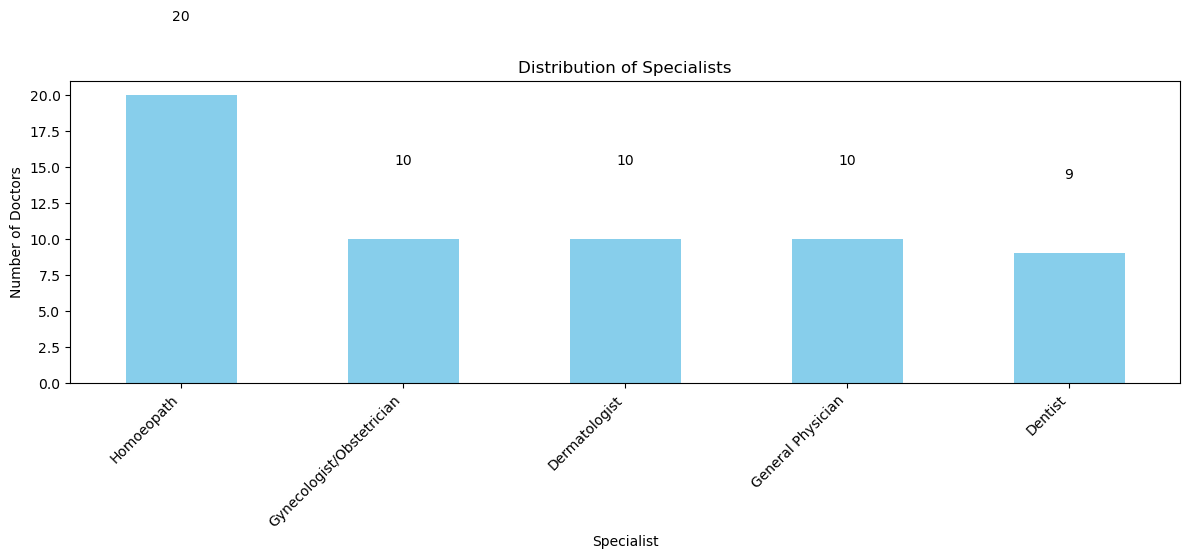

In [104]:


# Count the number of doctors in each specialist category in the 'combined_df'
specialist_counts = combined_df['Specialist'].value_counts()

# Create a bar chart to visualize the distribution of specialists
plt.figure(figsize=(12, 6))
ax = specialist_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Specialists')
plt.xlabel('Specialist')
plt.ylabel('Number of Doctors')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i, v in enumerate(specialist_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()




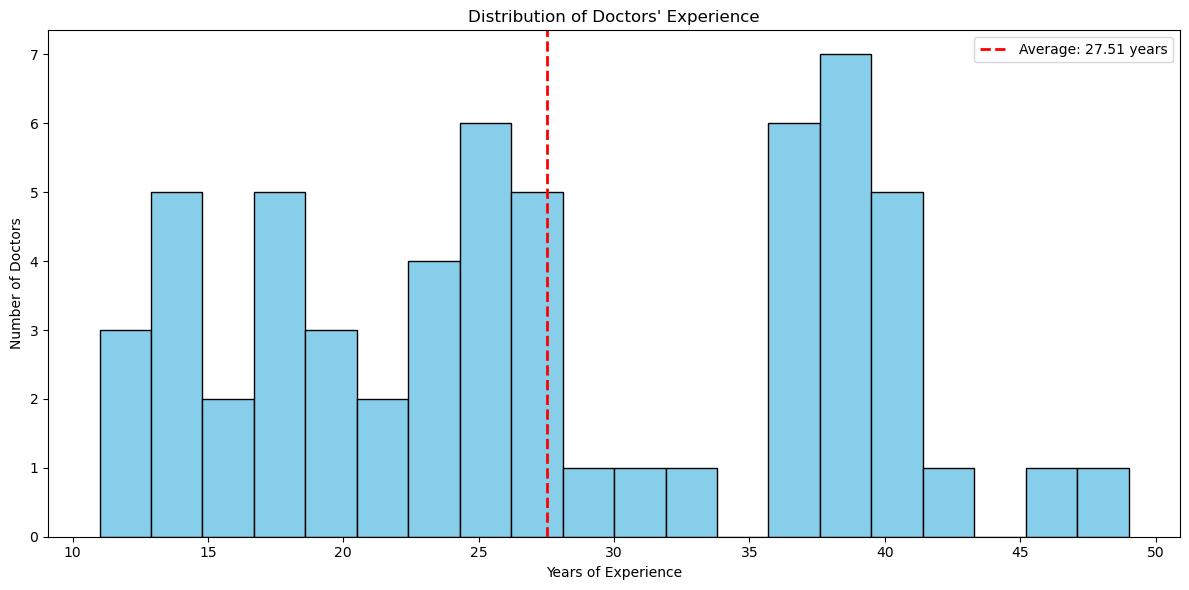

Average Experience: 27.51 years
Minimum Experience: 11 years
Maximum Experience: 49 years


In [88]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert the 'Experience' column to numeric (in case it's not already)
combined_df['Experience'] = pd.to_numeric(combined_df['Experience'], errors='coerce')

# Calculate the average, minimum, and maximum years of experience
average_experience = combined_df['Experience'].mean()
min_experience = combined_df['Experience'].min()
max_experience = combined_df['Experience'].max()

# Create a histogram to visualize the distribution of doctors' experience
plt.figure(figsize=(12, 6))
plt.hist(combined_df['Experience'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Doctors\' Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Doctors')
plt.axvline(average_experience, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_experience:.2f} years')
plt.legend()
plt.tight_layout()
plt.show()

# Print the calculated statistics
print(f'Average Experience: {average_experience:.2f} years')
print(f'Minimum Experience: {min_experience} years')
print(f'Maximum Experience: {max_experience} years')


                       Area  Number of Doctors
0                Pusa Road,                  7
1   Greater Kailash Part 1,                  6
2                   Dwarka,                  5
3             Punjabi Bagh,                  3
4   Greater Kailash Part 2,                  3
5       Safdarjung Enclave,                  2
6         Patel Nagar East,                  2
7                   Rohini,                  2
8         Rohini Sector 11,                  1
9         Mayur Vihar Ph-I,                  1
10         Dwarka Sector 7,                  1
11               Janakpuri,                  1
12             Laxmi Nagar,                  1
13          Lajpat Nagar 4,                  1
14             Patel Nagar,                  1
15           Paschim Vihar,                  1
16             Tilak Nagar,                  1
17                 Kalkaji,                  1
18         Dwarka Sector 2,                  1
19         Panchsheel Park,                  1
20           

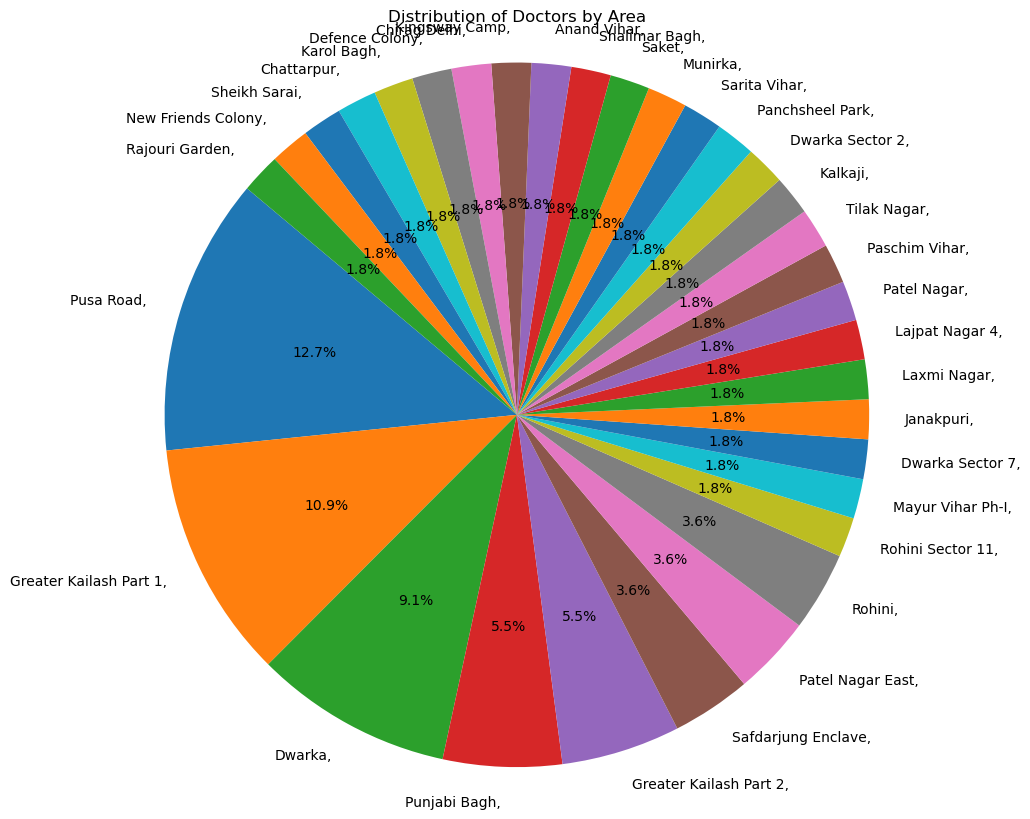

In [144]:


# Count the number of doctors in each area
area_counts = combined_df['Area'].value_counts()

# Create a table to show the distribution of doctors by area
area_distribution_table = pd.DataFrame({'Area': area_counts.index, 'Number of Doctors': area_counts.values})

# Display the table
print(area_distribution_table)

# Create a pie chart to visualize the distribution of doctors by area
plt.figure(figsize=(10, 10))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Doctors by Area')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [95]:
# Check the data type of the "Consultation_fee" column
print(combined_df["Consultation_fee"].dtype)

# If it's not already a string, convert it to string and then to numeric
if combined_df["Consultation_fee"].dtype != 'str':
    combined_df["Consultation_fee"] = combined_df["Consultation_fee"].astype(str)

# Remove commas and convert to numeric
combined_df["Consultation_fee"] = combined_df["Consultation_fee"].str.replace(',', '', regex=True).astype(int)

# Find the hospital with the highest consultation fee
highest_fee_hospital = combined_df.loc[combined_df["Consultation_fee"].idxmax()]

# Create a DataFrame to display this information
highest_fee_df = pd.DataFrame({
    'Hospital_name': [highest_fee_hospital['Hospital_name']],
    'Consultation_fee': [highest_fee_hospital['Consultation_fee']],
    'Specialist': [highest_fee_hospital['Specialist']],
    'Doctor_name': [highest_fee_hospital['Doctor_name']]
})

# Display the information in a table
print("Hospital with the Highest Consultation Fee:")
print(highest_fee_df)


int32
Hospital with the Highest Consultation Fee:
  Hospital_name  Consultation_fee                 Specialist  \
0      + 1 more              2000  Gynecologist/Obstetrician   

           Doctor_name  
0  Dr. Shakuntla Kumar  


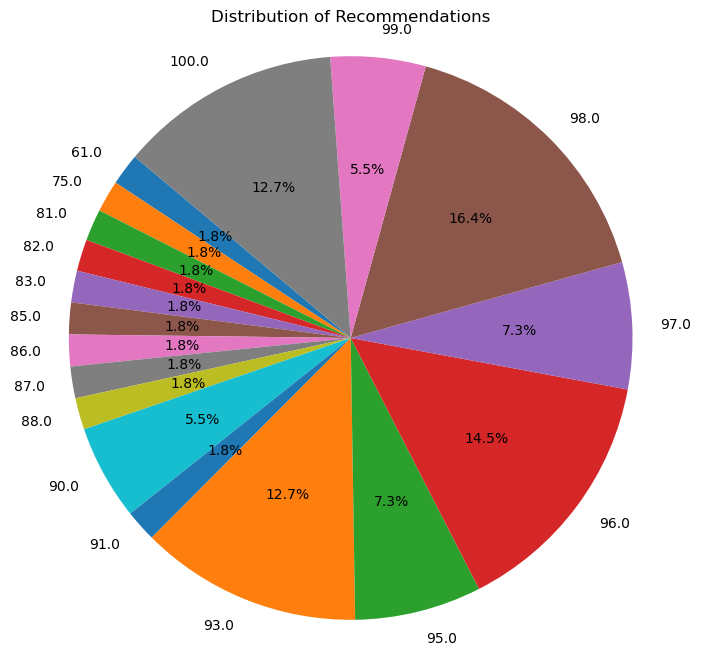

Average Recommendation Percentage: 93.72727272727273


In [146]:


# Split the "Recommendation" column to handle multiple percentages in one cell
combined_df["Recommendation"] = combined_df["Recommendation"].str.split().str[0]  # Take the first percentage

# Convert the "Recommendation" column to numeric by removing '%' and converting to float
combined_df["Recommendation"] = combined_df["Recommendation"].str.replace('%', '').astype(float)

# Analyze the distribution of recommendations
recommendation_counts = combined_df["Recommendation"].value_counts().sort_index()

# Calculate the average recommendation percentage
average_recommendation = combined_df["Recommendation"].mean()

# Create a pie chart to visualize the distribution of recommendations
plt.figure(figsize=(8, 8))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Recommendations")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is round.
plt.show()

# Display the average recommendation percentage
print("Average Recommendation Percentage:", average_recommendation)


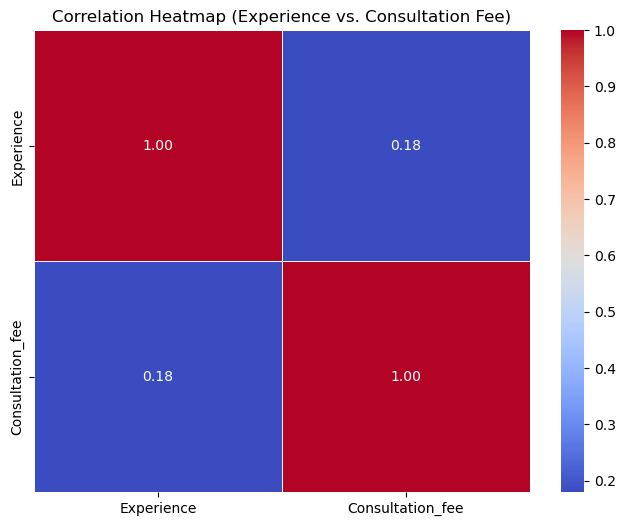

Top 5 Experienced Doctors:
                  Doctor_name  Experience
37             Dr. K.S. Walia          49
35         Dr. Narinder Tikoo          47
10      Dr. Malvika Sabharwal          42
29  Dr. Rajinder Kumar Singal          41
49        Dr. Neeraj Pasricha          41


In [96]:

import seaborn as sns

# Convert "Experience" and "Consultation Fee" columns to numeric
combined_df["Experience"] = pd.to_numeric(combined_df["Experience"], errors="coerce")
combined_df["Consultation_fee"] = pd.to_numeric(combined_df["Consultation_fee"], errors="coerce")

# Calculate the correlation between "Experience" and "Consultation Fee"
correlation = combined_df["Experience"].corr(combined_df["Consultation_fee"])

# Visualize the correlation using a heatmap
correlation_matrix = combined_df[["Experience", "Consultation_fee"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Experience vs. Consultation Fee)")
plt.show()

# Find the top 5 experienced doctors
top_5_experienced_doctors = combined_df.sort_values(by="Experience", ascending=False).head(5)

# Display the top 5 experienced doctors
print("Top 5 Experienced Doctors:")
print(top_5_experienced_doctors[["Doctor_name", "Experience"]])


In [102]:
# Convert the "Experience" column to numeric
combined_df["Experience"] = pd.to_numeric(combined_df["Experience"], errors="coerce")

# Find the top 5 doctors with the highest years of experience
top_5_experienced_doctors = combined_df.nlargest(5, "Experience")

# Display the top 5 experienced doctors in a table
print("Top 5 Doctors with the Highest Years of Experience:")
print(top_5_experienced_doctors[["Doctor_name", "Experience"]])

# Convert the "Consultation Fee" column to numeric
combined_df["Consultation_fee"] = pd.to_numeric(combined_df["Consultation_fee"], errors="coerce")

# Find the top 5 doctors with the highest consultation fees
top_5_highest_fee_doctors = combined_df.nlargest(5, "Consultation_fee")

# Display the top 5 doctors with the highest consultation fees in a table
print("\nTop 5 Doctors with the Highest Consultation Fees:")
print(top_5_highest_fee_doctors[["Doctor_name", "Consultation_fee"]])


Top 5 Doctors with the Highest Years of Experience:
                  Doctor_name  Experience
37             Dr. K.S. Walia          49
35         Dr. Narinder Tikoo          47
10      Dr. Malvika Sabharwal          42
16        Dr. Yuvakshi Juneja          41
29  Dr. Rajinder Kumar Singal          41

Top 5 Doctors with the Highest Consultation Fees:
                  Doctor_name  Consultation_fee
17        Dr. Shakuntla Kumar              2000
29  Dr. Rajinder Kumar Singal              1800
34            Dr. Atul Bhasin              1800
15            Dr. Madhu Ahuja              1500
20   Dr. Pallav S Kishanpuria              1500


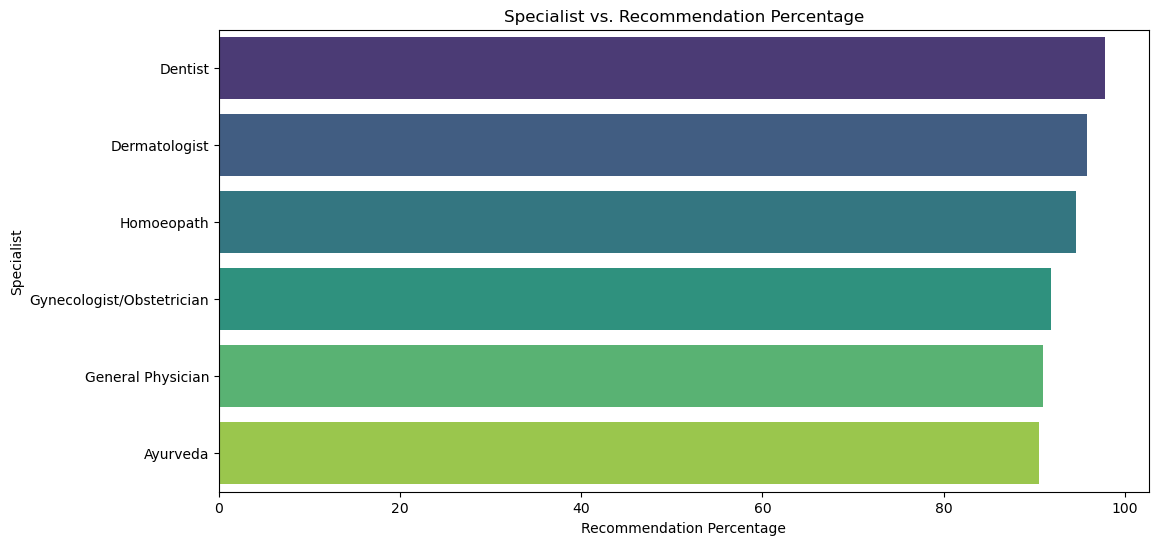

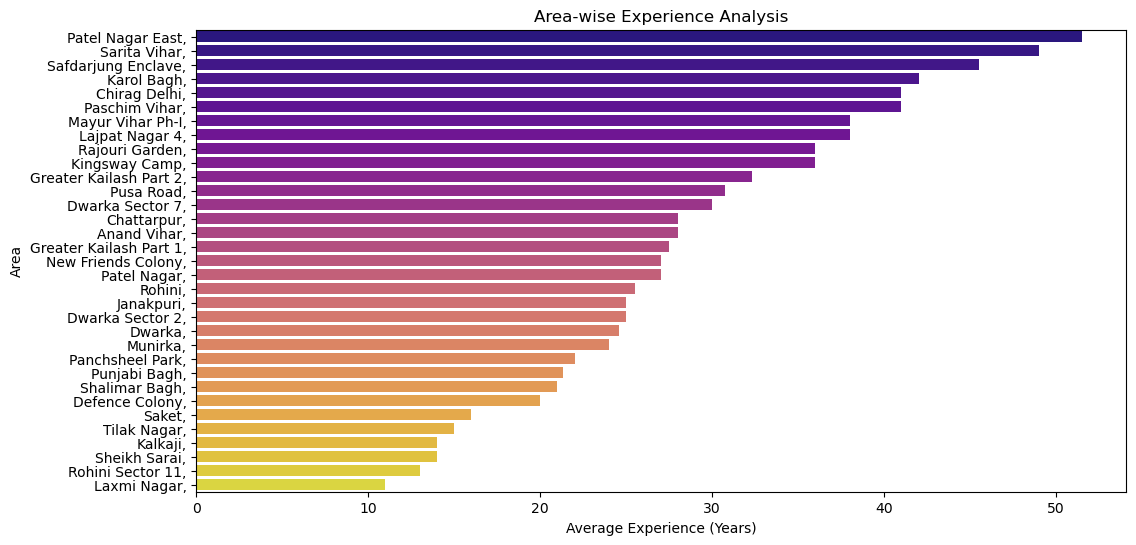

In [150]:

# Investigate the correlation between a doctor's specialist and their recommendation percentage
specialist_vs_recommendation = combined_df.groupby("Specialist")["Recommendation"].mean().reset_index()

# Sort by average recommendation percentage in descending order
specialist_vs_recommendation = specialist_vs_recommendation.sort_values(by="Recommendation", ascending=False)

# Create a bar chart to display the relationship between specialist and recommendation
plt.figure(figsize=(12, 6))
sns.barplot(x="Recommendation", y="Specialist", data=specialist_vs_recommendation, palette="viridis")
plt.title("Specialist vs. Recommendation Percentage")
plt.xlabel("Recommendation Percentage")
plt.ylabel("Specialist")
plt.show()

# Perform area-wise experience analysis
area_wise_experience = combined_df.groupby("Area")["Experience"].mean().reset_index()

# Sort by average experience in descending order
area_wise_experience = area_wise_experience.sort_values(by="Experience", ascending=False)

# Create a bar chart to display area-wise experience analysis
plt.figure(figsize=(12, 6))
sns.barplot(x="Experience", y="Area", data=area_wise_experience, palette="plasma")
plt.title("Area-wise Experience Analysis")
plt.xlabel("Average Experience (Years)")
plt.ylabel("Area")
plt.show()


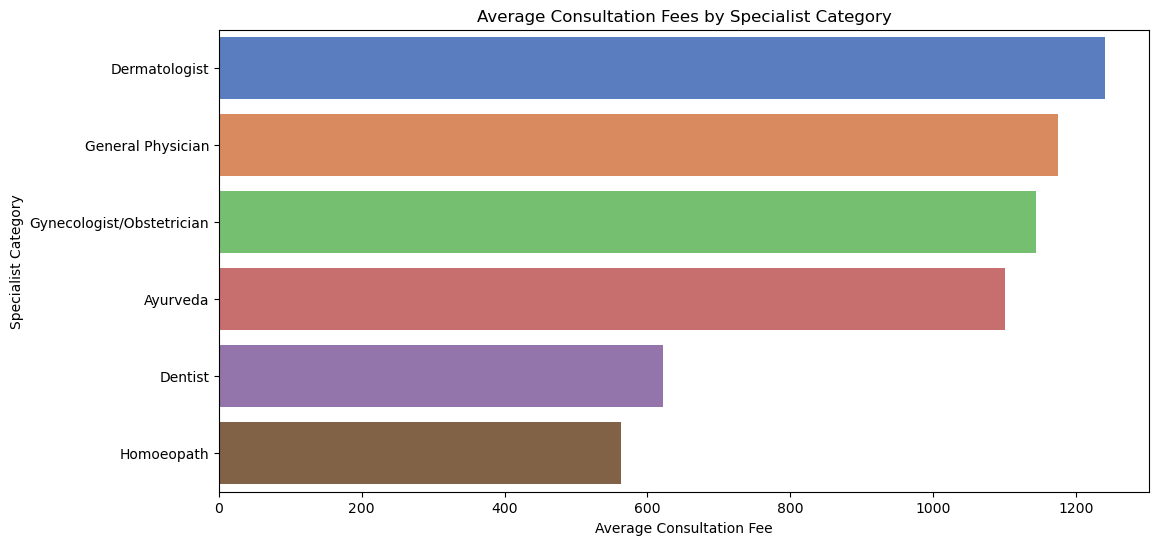

Hospital-wise Consultation Fees:
                                      Hospital_name  Consultation_fee
14                      Dr. Sudha's Ayurveda Kendra       1500.000000
9                     Dr Anjana Kalia's Diet clinic       1500.000000
1                                  Aashlok Hospital       1500.000000
22                       SCI International Hospital       1375.000000
2                           Apollo Spectra Hospital       1250.000000
15                  Hakim Hari Kishan Lal Dawakhana       1100.000000
3                 BLK-Max Super Speciality Hospital       1100.000000
28                                         + 1 more       1086.666667
29                                         + 2 more       1000.000000
26                                 The Dental Roots       1000.000000
24                                  Skin Hair & You       1000.000000
21                      Pasricha Homeo Care Clinics       1000.000000
17                             Jeewan Mala Hospital      

In [151]:


# Convert the "Consultation Fee" column to numeric
combined_df["Consultation_fee"] = pd.to_numeric(combined_df["Consultation_fee"], errors="coerce")

# Compare the average consultation fees among different specialist categories
specialist_avg_fees = combined_df.groupby("Specialist")["Consultation_fee"].mean().reset_index()

# Sort by average consultation fee in descending order
specialist_avg_fees = specialist_avg_fees.sort_values(by="Consultation_fee", ascending=False)

# Create a bar chart to compare average consultation fees by specialist category
plt.figure(figsize=(12, 6))
sns.barplot(x="Consultation_fee", y="Specialist", data=specialist_avg_fees, palette="muted")
plt.title("Average Consultation Fees by Specialist Category")
plt.xlabel("Average Consultation Fee")
plt.ylabel("Specialist Category")
plt.show()

# Calculate and display hospital-wise consultation fees
hospital_wise_fees = combined_df.groupby("Hospital_name")["Consultation_fee"].mean().reset_index()

# Sort by average consultation fee in descending order
hospital_wise_fees = hospital_wise_fees.sort_values(by="Consultation_fee", ascending=False)

# Display hospital-wise consultation fees in a table
print("Hospital-wise Consultation Fees:")
print(hospital_wise_fees)


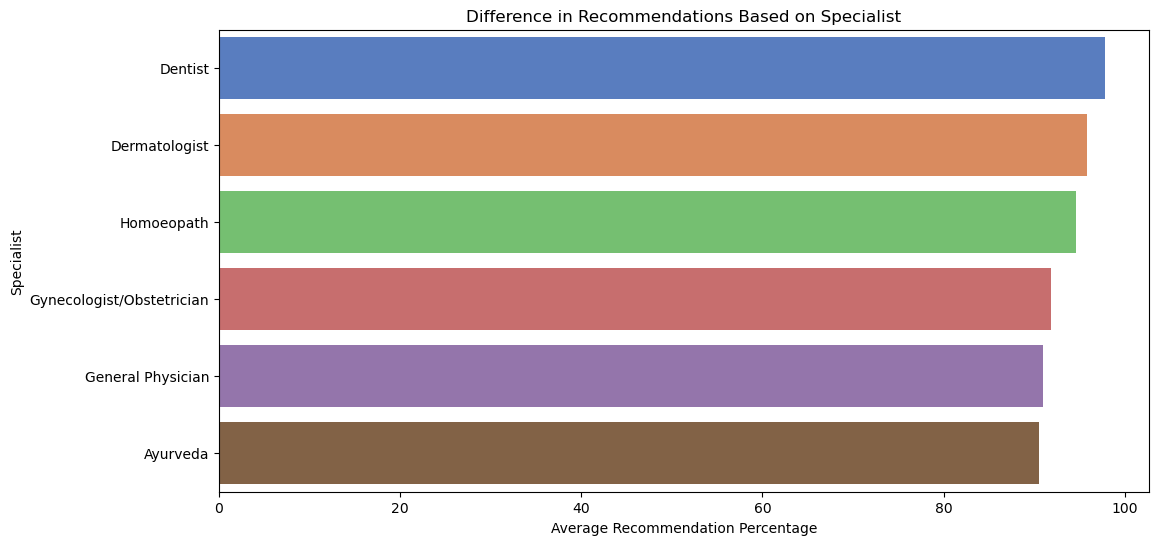

Difference in Recommendations Based on Specialist:
                  Specialist  Recommendation
1                    Dentist       97.777778
2              Dermatologist       95.800000
5                 Homoeopath       94.600000
4  Gynecologist/Obstetrician       91.888889
3          General Physician       91.000000
0                   Ayurveda       90.571429


In [152]:
# Examine the difference in recommendations based on the specialist
specialist_vs_recommendation = combined_df.groupby("Specialist")["Recommendation"].mean().reset_index()

# Sort by average recommendation percentage in descending order
specialist_vs_recommendation = specialist_vs_recommendation.sort_values(by="Recommendation", ascending=False)

# Create a bar chart to present the difference in recommendations based on the specialist
plt.figure(figsize=(12, 6))
sns.barplot(x="Recommendation", y="Specialist", data=specialist_vs_recommendation, palette="muted")
plt.title("Difference in Recommendations Based on Specialist")
plt.xlabel("Average Recommendation Percentage")
plt.ylabel("Specialist")
plt.show()

# Display the same information in a table
print("Difference in Recommendations Based on Specialist:")
print(specialist_vs_recommendation)


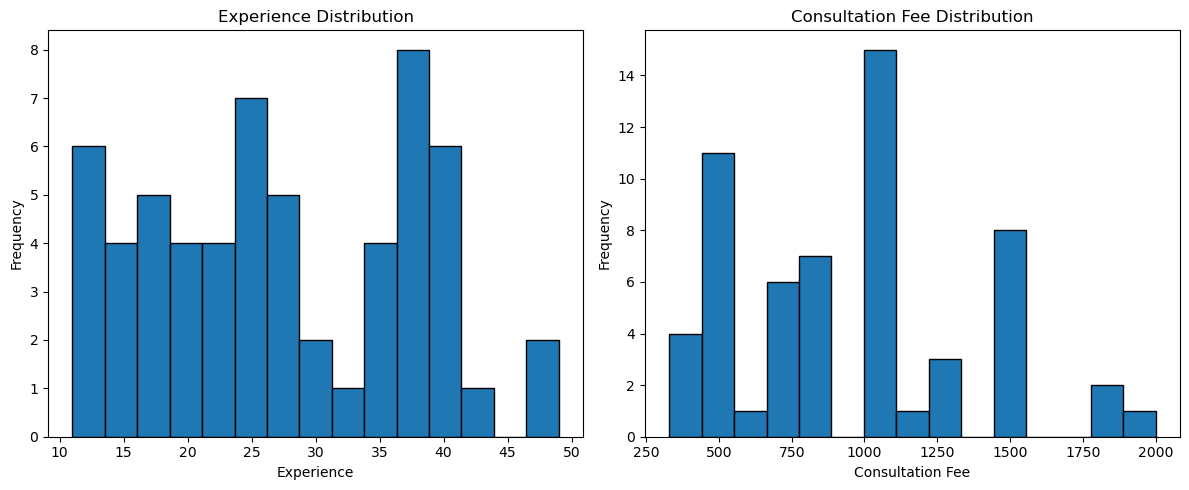

Experience Summary:
count    59.000000
mean     27.508475
std      10.284526
min      11.000000
25%      18.500000
50%      26.000000
75%      37.500000
max      49.000000
Name: Experience, dtype: float64

Consultation Fee Summary:
count      59.000000
mean      934.067797
std       408.188254
min       330.000000
25%       550.000000
50%      1000.000000
75%      1150.000000
max      2000.000000
Name: Consultation_fee, dtype: float64


In [99]:

# Convert columns to numeric (if not already)
combined_df["Experience"] = pd.to_numeric(combined_df["Experience"], errors="coerce")
combined_df["Consultation_fee"] = pd.to_numeric(combined_df["Consultation_fee"], errors="coerce")

# Summary statistics for 'Experience' and 'Consultation_fee'
experience_summary = combined_df["Experience"].describe()
fee_summary = combined_df["Consultation_fee"].describe()

# Create bar charts for 'Experience' and 'Consultation_fee'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
combined_df["Experience"].plot(kind="hist", ax=axes[0], edgecolor="k", bins=15)
axes[0].set_title("Experience Distribution")
axes[0].set_xlabel("Experience")
axes[0].set_ylabel("Frequency")

combined_df["Consultation_fee"].plot(kind="hist", ax=axes[1], edgecolor="k", bins=15)
axes[1].set_title("Consultation Fee Distribution")
axes[1].set_xlabel("Consultation Fee")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Print the summary statistics in a tabular format
print("Experience Summary:")
print(experience_summary)

print("\nConsultation Fee Summary:")
print(fee_summary)


C:\Users\nakul\AppData\Local\Temp\ipykernel_9652\2026001535.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='Specialist', y='Consultation_fee', ci=None)


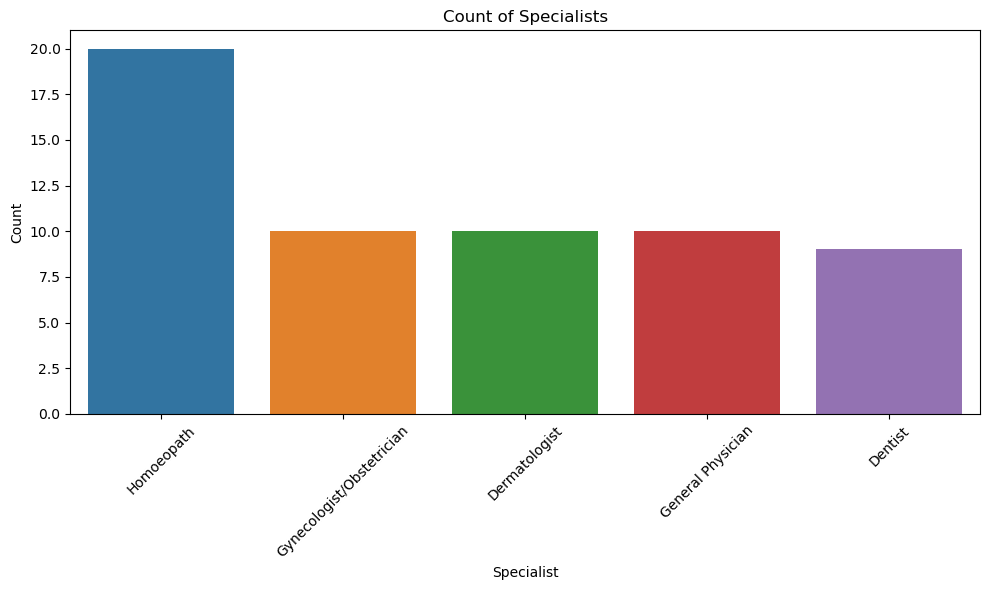

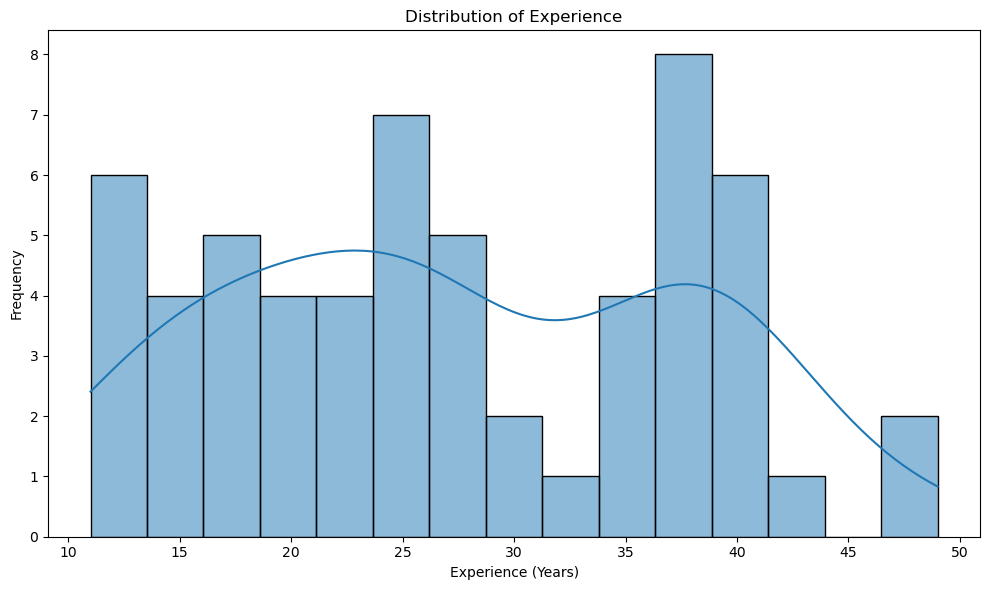

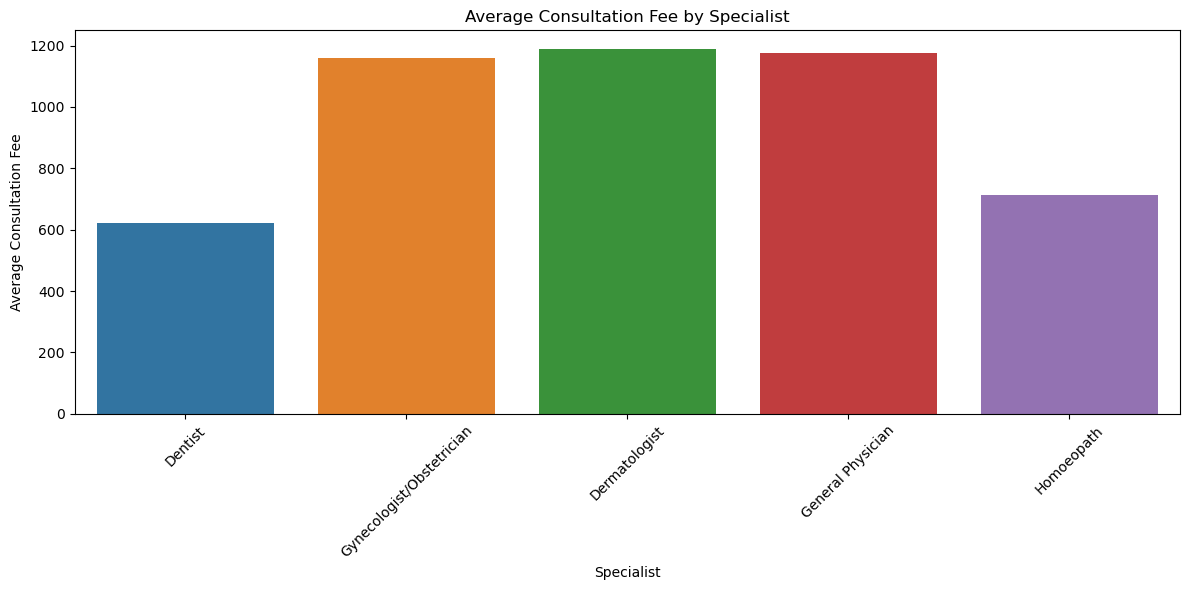

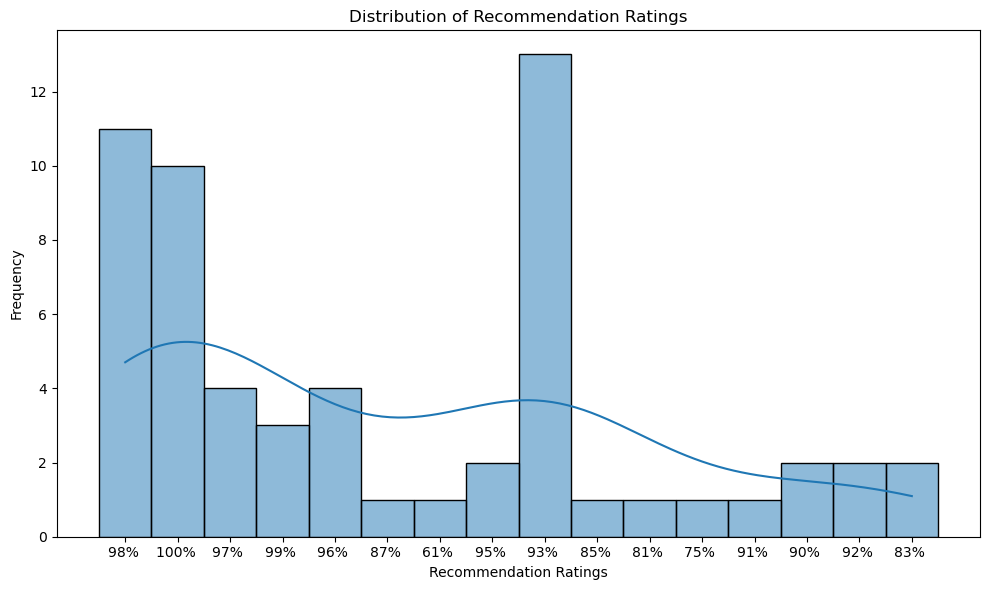

In [100]:


# Count of Specialists
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='Specialist', order=combined_df['Specialist'].value_counts().index)
plt.title('Count of Specialists')
plt.xticks(rotation=45)
plt.xlabel('Specialist')
plt.ylabel('Count')
plt.tight_layout()

# Distribution of Experience
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='Experience', bins=15, kde=True)
plt.title('Distribution of Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.tight_layout()

# Average Consultation Fee by Specialist
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, x='Specialist', y='Consultation_fee', ci=None)
plt.title('Average Consultation Fee by Specialist')
plt.xticks(rotation=45)
plt.xlabel('Specialist')
plt.ylabel('Average Consultation Fee')
plt.tight_layout()

# Distribution of Recommendation Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='Recommendation', bins=10, kde=True)
plt.title('Distribution of Recommendation Ratings')
plt.xlabel('Recommendation Ratings')
plt.ylabel('Frequency')
plt.tight_layout()

# Show all plots
plt.show()
